# 6.4 - Supervised Machine Learning: Regression

### Supervised Machine Learning for Airbnb booked properties for 2021.

## 1. Install the scikit-learn library.
## 2. Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/carolinazea/OneDrive/CareerFoundry/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path,'files', '2021_NYC_Airbnb_Data.csv'))

In [13]:
pd.set_option('display.max_columns', None)

## 3. Clean your data so that it’s ready for analysis.

In [5]:
df.columns

Index(['host_id', 'host_since', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group', 'latitude', 'longitude', 'property_type',
       'room_type', 'property_accommodates', 'property_bathrooms', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'instant_bookable'],
      dtype='object')

In [14]:
df.head(20)

,host_id,host_since,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,property_accommodates,property_bathrooms,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable
0,191091,8/4/10,Within A Few Hours,Superhost,Host has a Profile Picture,Host identity verified,Tribeca,Manhattan,40.72100,-74.00971,Entire rental unit,Entire home/apt,6,1 bath,250,30,90,Host has availability,298,13,1/4/20,12/29/20,4.85,Host not instant bookable
1,244071,9/24/10,Within An Hour,Superhost,Host has a Profile Picture,Host identity verified,Ditmars Steinway,Queens,40.77868,-73.90652,Entire rental unit,Entire home/apt,4,1 bath,140,4,1125,Host has availability,137,14,10/5/21,11/9/21,4.93,Host not instant bookable
2,503800,4/12/11,Within An Hour,Superhost,Host has a Profile Picture,Host identity verified,Crown Heights,Brooklyn,40.67654,-73.94629,Entire rental unit,Entire home/apt,4,1 bath,101,1,14,Host has availability,128,16,5/20/21,11/7/21,4.88,Host instant bookable
3,262812,10/15/10,Within A Day,Not a Superhost,Host has a Profile Picture,Host identity verified,Williamsburg,Brooklyn,40.71983,-73.95992,Entire rental unit,Entire home/apt,6,1 bath,250,30,90,Host has availability,77,57,5/5/19,12/11/19,4.45,Host not instant bookable
4,663384,6/4/11,Within A Day,Superhost,Host has a Profile Picture,Host identity verified,Park Slope,Brooklyn,40.67494,-73.97792,Entire residential home,Entire home/apt,5,2.5 baths,275,5,30,Host has availability,0,29,1/2/19,11/28/21,4.93,Host not instant bookable
5,314941,12/10/10,Within An Hour,Superhost,Host has a Profile Picture,Host identity verified,Nolita,Manhattan,40.72212,-73.99638,Entire rental unit,Entire home/apt,6,1 bath,526,1,365,Host has availability,102,18,7/10/20,8/14/21,4.94,Host not instant bookable
6,65610,12/25/09,Within An Hour,Not a Superhost,Host has a Profile Picture,Host identity verified,Williamsburg,Brooklyn,40.72136,-73.95674,Entire condominium (condo),Entire home/apt,2,1 bath,150,60,365,Host has availability,77,1,12/19/20,12/19/20,5.00,Host not instant bookable
7,1434931,11/23/11,A Few Days Or More,Not a Superhost,Host has a Profile Picture,Host identity verified,Clinton Hill,Brooklyn,40.68321,-73.96741,Entire rental unit,Entire home/apt,3,1 bath,135,30,120,Host has availability,318,11,5/3/19,3/4/20,4.90,Host not instant bookable
8,1209728,9/26/11,Within An Hour,Not a Superhost,Host has a Profile Picture,Host identity not verified,Bayside,Queens,40.75537,-73.77159,Entire guest suite,Entire home/apt,5,1 bath,100,3,1125,Host has availability,332,1,11/8/21,11/8/21,5.00,Host not instant bookable
9,1681546,1/31/12,Within An Hour,Superhost,Host has a Profile Picture,Host identity not verified,Chinatown,Manhattan,40.71502,-73.99170,Entire loft,Entire home/apt,2,1 bath,200,14,130,Host has availability,219,19,1/1/20,10/31/21,4.78,Host not instant bookable


In [7]:
df.shape

(6716, 24)

In [8]:
df.isnull().sum()

host_id                   0
host_since                0
host_response_time        0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood             0
neighbourhood_group       0
latitude                  0
longitude                 0
property_type             0
room_type                 0
property_accommodates     0
property_bathrooms        0
price                     0
minimum_nights            0
maximum_nights            0
has_availability          0
availability_365          0
number_of_reviews         0
first_review              0
last_review               0
review_scores_rating      0
instant_bookable          0
dtype: int64

In [9]:
dups_df = df.duplicated()

In [11]:
dups_df.shape

(6716,)

## Data prep for regression analysis

## 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

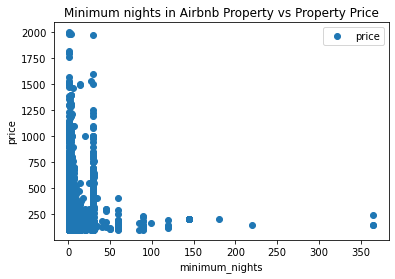

In [34]:
df.plot(x = 'minimum_nights', y='price',style='o') # The style option creates a scatterplot; without it, we 
                                                      # only have lines.
plt.title('Minimum nights in Airbnb Property vs Property Price')  
plt.xlabel('minimum_nights')  
plt.ylabel('price')  
plt.show()

### My hypothesis differentiated from the last exercise - I am wondering if minimum nights has an effect on 
###  Airbnb listing price. My original hypothesis orginally stated that certain boroughs would be listed at a higher price - but I am thinking as vital as location is in a listing, the majority of people would likely book a certain amount of nights due to either events, gatherings or overall personal accommodation. 

## 5. Hypothesis: The amount of nights an Airbnb host lists on the site, can decrease the property price.

## 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [35]:
X = df['minimum_nights'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [36]:
y

array([[ 250],
       [ 140],
       [ 101],
       ...,
       [ 241],
       [ 117],
       [1980]])

In [38]:
X

array([[30],
       [ 4],
       [ 1],
       ...,
       [ 2],
       [ 1],
       [ 1]])

## 7. Split the data into two sets: a training set and a test set.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

## 8. Run a linear regression on the data.

In [40]:
regression = LinearRegression()

In [41]:
regression.fit(X_train, y_train)

LinearRegression()

In [42]:
y_predicted = regression.predict(X_test)

## 9. Create a plot that shows the regression line on the test set.

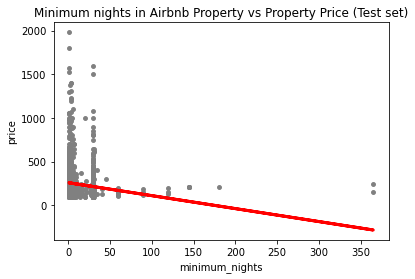

In [43]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Minimum nights in Airbnb Property vs Property Price (Test set)')
plot_test.xlabel('minimum_nights')
plot_test.ylabel('price')
plot_test.show()

## 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### Reading the notes on the exercise, the 'linear regression will pass a straight line through the data points involved and attempt to find a line of best fit—a line that passes through a maximum number of data points'

### The chart above indicates that the regression line does not cover all of the data points. Between 0 to 50, there is more cluster and a possible outlier (located to the far right in the chart - 350) in the minimum_nights variable. 

### Model’s summary statistics

In [45]:
# Creating objects with mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [46]:
# Checking Slope, Mean squared error, and R2

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.48416738]]
Mean squared error:  33966.29820005924
R2 score:  0.005477478682240244


## 11. Check the model performance statistics—MSE and R2.
### Slope: How the y (price) variable changes when X (minimum_nights) changes.

### - The slope here means that the least amount of nights an individual can rent an Airbnb property, the property price drops at a degree of -1.484.

### R2: Values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. 

### - The R2 is .0054 which incidates a poor fit. This is not good.

## Last manual check

In [47]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,125,215.945612
1,300,257.502299
2,150,258.986466
3,600,215.945612
4,207,256.018132
5,115,256.018132
6,125,258.986466
7,135,257.502299
8,133,215.945612
9,145,215.945612


## 12. Compare the predicted y values with the actual y values in a dataframe.

In [48]:
y_predicted_train = regression.predict(X_train)

In [49]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.48416738]]
Mean squared error:  35126.64707001206
R2 score:  0.01465374460896307


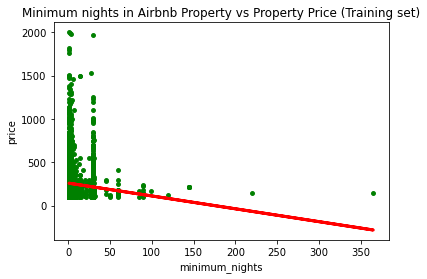

In [51]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Minimum nights in Airbnb Property vs Property Price (Training set)')
plot_test.xlabel('minimum_nights')
plot_test.ylabel('price')
plot_test.show()

### As the exercise stated, I did have a slightly higher R2 score on the train set and a much lower score on the test set - which means I overfitted my model. 
### R2 (Training Set) : 0.005
### R2 (Test Set) : 0.014

### Thereby, I can rule out my hypothesis: The least amount of nights an individual can book an Airbnb property, the property price drops. 

## 13. Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

### I belive the model performed badly on the test set. I will look at my dataset again and see which independant variable I can use for the regression analysis. 

In [53]:
df.head()

,host_id,host_since,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_group,latitude,longitude,property_type,room_type,property_accommodates,property_bathrooms,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable
0,191091,8/4/10,Within A Few Hours,Superhost,Host has a Profile Picture,Host identity verified,Tribeca,Manhattan,40.72100,-74.00971,Entire rental unit,Entire home/apt,6,1 bath,250,30,90,Host has availability,298,13,1/4/20,12/29/20,4.85,Host not instant bookable
1,244071,9/24/10,Within An Hour,Superhost,Host has a Profile Picture,Host identity verified,Ditmars Steinway,Queens,40.77868,-73.90652,Entire rental unit,Entire home/apt,4,1 bath,140,4,1125,Host has availability,137,14,10/5/21,11/9/21,4.93,Host not instant bookable
2,503800,4/12/11,Within An Hour,Superhost,Host has a Profile Picture,Host identity verified,Crown Heights,Brooklyn,40.67654,-73.94629,Entire rental unit,Entire home/apt,4,1 bath,101,1,14,Host has availability,128,16,5/20/21,11/7/21,4.88,Host instant bookable
3,262812,10/15/10,Within A Day,Not a Superhost,Host has a Profile Picture,Host identity verified,Williamsburg,Brooklyn,40.71983,-73.95992,Entire rental unit,Entire home/apt,6,1 bath,250,30,90,Host has availability,77,57,5/5/19,12/11/19,4.45,Host not instant bookable
4,663384,6/4/11,Within A Day,Superhost,Host has a Profile Picture,Host identity verified,Park Slope,Brooklyn,40.67494,-73.97792,Entire residential home,Entire home/apt,5,2.5 baths,275,5,30,Host has availability,0,29,1/2/19,11/28/21,4.93,Host not instant bookable


### A possible variable I might try instead for the regression analysis could be - 'availability_365.' 
### Potential bias: Since dataset is listed for 2021 in NYC, the pandemic could definitely incur potential bias. Maybe more hosts were not lising their property on the Airbnb site due to safety concerns or hosts were listing their property in hopes to amerliorate safe distancing practices. There is no way to know this, but this could be a determining factor as to the amount of nights an individual books via Airbnb site. 